In [1]:
import os, sys
sys.path.append(os.chdir(os.getcwd()+"/.."))

import numpy as np
import matplotlib.pyplot as plt
from src.potential1D import harmonicOsc1D

%matplotlib inline

# Simple Potentials

## Harmonic Oscillartor

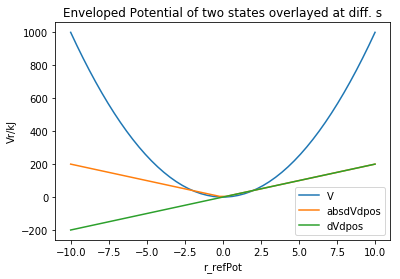

In [2]:
##Build Potential
pot = harmonicOsc1D(x_shift=0, fc=20)

##Params
positions = np.linspace(-10,10)
energies = pot.ene(positions)
dVdpos = pot.dhdpos(positions)

##EXAMPLE PLOT
plt.plot(positions, energies, label="V")
plt.plot(positions, list(map(abs, dVdpos)), label="absdVdpos")
plt.plot(positions, dVdpos, label="dVdpos")
plt.ylabel("Vr/kJ")
plt.xlabel("r_refPot")
plt.title("Enveloped Potential of two states overlayed at diff. s")
plt.legend()
plt.show()

# OLD

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colorbar
import src.conveyorBelt  as cvb
import src.system as system1D 
from src.potential1D import pertHarmonicOsc1D, linCoupledHosc, expCoupledHosc



In [3]:
pot_stretch = pertHarmonicOsc1D()
pot_lin_strech = linCoupledHosc(ha=harmonicOsc1D(fc=1.0, x_shift=0.0), hb=harmonicOsc1D(fc=11.0, x_shift=0.0))
pot_exp_strech = expCoupledHosc(ha=harmonicOsc1D(fc=1.0, x_shift=0.0), hb=harmonicOsc1D(fc=11.0, x_shift=0.0), s=0.025, temp=300.0)

In [ ]:
x=np.linspace(-10, 10, 100)
lam=np.linspace(0,1,100)
xx, ll = np.meshgrid(x, lam)

energy_map = []
for y in lam:
    pot_lin_strech.set_lam(y)
    row = pot_lin_strech.ene([pos for pos in x])
    energy_map.append(row)    

TypeError: Invalid dimensions for image data

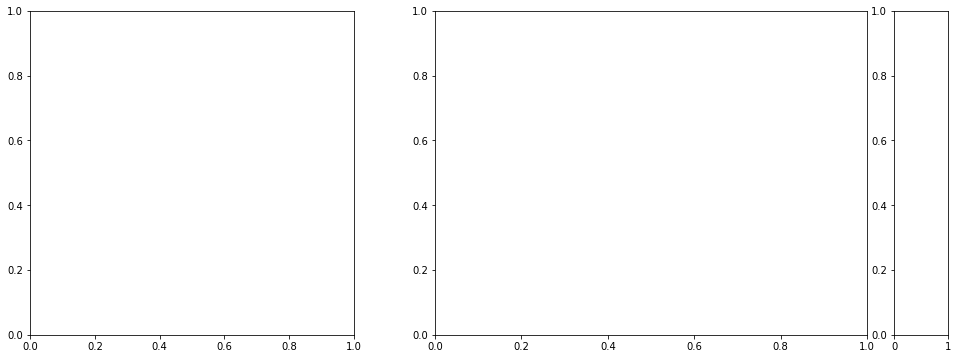

In [22]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0.05, 0.05, 0.4, 0.9])
ax2 = fig.add_axes([0.475, 0.05, 0.4, 0.9])
ax3 = fig.add_axes([0.9, 0.05, 0.05, 0.9])          

surf = ax1.imshow(energy_map, cmap="viridis", interpolation="nearest",
                 origin='center', extent=[min(x), max(x), min(lam), max(lam)],  vmax=100, vmin=0)

#surf = ax1.imshow(xx, ll, c=list(energy_map), vmin=0, vmax=100, s=40, edgecolors='face')
#fig.colorbar(surf, aspect=5, label='Energy')
#ax[1].scatter(xx, ll, c=pot_lin_strech.ene(ll, xx), cmap=cm.viridis, rstride=1, cstride=1,, vmin=0, vmax=200, edgecolors='face')
#ax2.imshow(xx, ll, c=pot_exp_strech.ene(ll, xx), vmin=0, vmax=100, s=40, edgecolors='face')
colorbar.Colorbar(ax3, surf, label='Energy')
for a in [ax1, ax2]:
    a.set_xlim(-10,10)
    a.set_ylim(0, 1)
    a.set_xlabel('x')
ax1.set_ylabel('$\lambda$')
ax1.set_title('Linear')
ax2.set_title('Exponential')


ValueError: 'c' argument has 100 elements, which is not acceptable for use with 'x' with size 10000, 'y' with size 10000.

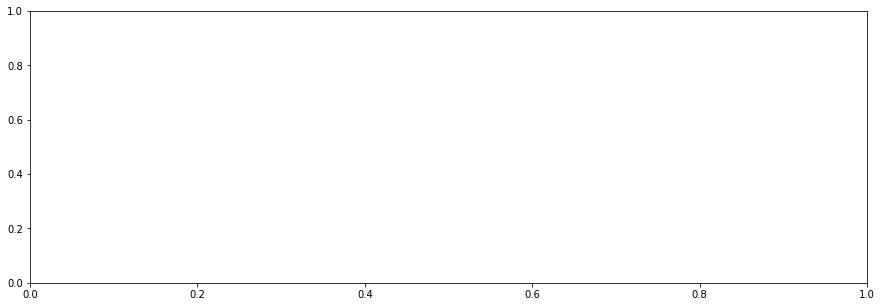

In [12]:
pot_x_shift=pertHarmonicOsc1D(fc=1.0, alpha=0.0, gamma=10.0)
x=np.linspace(-2.5, 12.5, 100)
lam=np.linspace(0,1,100)
xx, ll = np.meshgrid(x, lam)
fig = plt.figure(figsize=(15,5))

energy_map2 = []
for x,y in zip(xx, ll):
    pot_lin_strech.set_lam(y)
    row = pot_x_shift.ene(list(xx))
    energy_map2.append(row)              


surf = fig.gca().scatter(xx, ll, c=energy_map2, cmap=cm.viridis, vmin=0, vmax=50, s=40, edgecolors='face')

In [21]:
pot_lin_x_shift=linCoupledHosc(ha=pot.harmonicOsc1D(fc=1.0, x_shift=0.0), hb=pot.harmonicOsc1D(fc=3.0, x_shift=10.0))
pot_exp_x_shift=expCoupledHosc(ha=pot.harmonicOsc1D(fc=1.0, x_shift=0.0), hb=pot.harmonicOsc1D(fc=3.0, x_shift=10.0), s=0.05, temp=300.0)

Text(0.5, 1.0, 'Exponential')

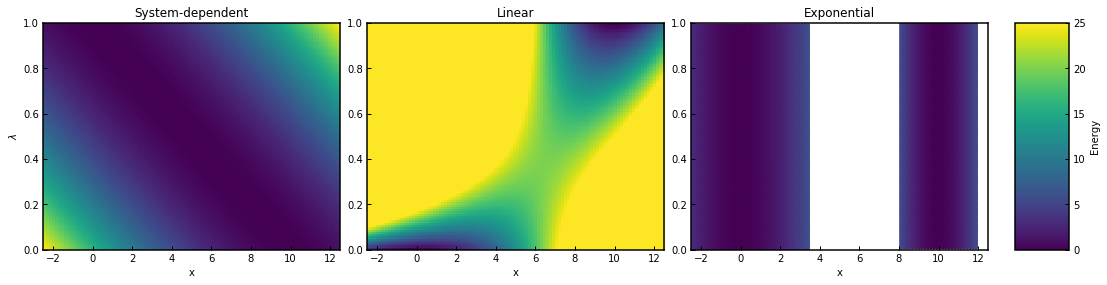

In [22]:
fig = plt.figure(figsize=(15,3.5))
ax1 = fig.add_axes([0.05, 0.05, 0.275, 0.9])
ax2 = fig.add_axes([0.35, 0.05, 0.275, 0.9])
ax3 = fig.add_axes([0.65, 0.05, 0.275, 0.9])
ax4 = fig.add_axes([0.95, 0.05, 0.05, 0.9])
#ax = fig.gca(projection='3d')
ax1.imshow(pot_x_shift.ene(ll, xx), extent=(-2.5, 12.5, 0, 1), aspect='auto')#scatter(xx, ll, c=pot_x_shift.ene(ll, xx), cmap=cm.viridis, vmin=0, vmax=25, edgecolors='face')
ax2.imshow(pot_lin_x_shift.ene(ll, xx), origin='lower', extent=(-2.5, 12.5, 0, 1), aspect='auto', vmax=25)#scatter(xx, ll, c=pot_lin_x_shift.ene(ll, xx), cmap=cm.viridis, vmin=0, vmax=25, edgecolors='face')
surf=ax3.scatter(xx, ll, c=pot_exp_x_shift.ene(ll, xx), cmap=cm.viridis, vmin=0, vmax=25, edgecolors='face')
colorbar.Colorbar(ax4, surf, label='Energy')
for a in [ax1, ax2, ax3]:
    a.set_xlim(-2.5,12.5)
    a.set_ylim(0, 1)
    a.set_xlabel('x')
ax1.set_ylabel('$\lambda$')
ax1.set_title('System-dependent')
ax2.set_title('Linear')

ax3.set_title('Exponential')

In [ ]:
import numpy as np
import typing as t
import potential1D as pot
import matplotlib.pyplot as plt

class lennardJonesPotential(pot.potential):
    '''
    Lennard Jones Potential
    '''
    c6:float = None
    c12:float = None
    x_shift:float = 0
    y_shift:float = 0
    def __init__(self, c6:float, c12:float, x_shift:float=0, y_shift=0):
        '''
        initializes flat well potential class
      
        '''
        super().__init__()
        self.c6 = c6
        self.c12 = c12
        self.x_shift=x_shift
        self.y_shift=y_shift
        
    def _calculate_energies(self, positions, *kargs) -> t.List[float]:
        return [(self.c12/(pos-self.x_shift)**12)-(self.c6/(pos-self.x_shift)**6)+self.y_shift if(pos-self.x_shift!=0) else np.infty for pos in positions]

    def _calculate_dhdpos(self, positions:(t.List[float] or float), *kargs) -> t.List[float]:
        return [6*((2*self.c12)-((pos-self.x_shift)**6*self.c6))/(pos-self.x_shift)**13+self.y_shift for pos in positions]
        
        
lj=lennardJonesPotential(c6=0.2,c12=0.0001, x_shift=-1)
positions=np.linspace(0.0000001,1,100)
energies = lj.ene(positions)

plt.plot(positions, energies)
plt.ylim((-100,100))